In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\USER\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,Count of Churn,Column Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Row Labels,Month-to-month,One year,Two year,Grand Total
1,Female,1925,718,845,3488
2,Male,1950,755,850,3555
3,Grand Total,3875,1473,1695,7043


In [5]:
df.head()

,Count of Churn,Column Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Row Labels,Month-to-month,One year,Two year,Grand Total
1,Female,1925,718,845,3488
2,Male,1950,755,850,3555
3,Grand Total,3875,1473,1695,7043


In [56]:
df.shape

(7043, 21)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
print("Duplicates before:",df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicates after:",df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [60]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'],inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_6164\947818424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'],inplace=True)


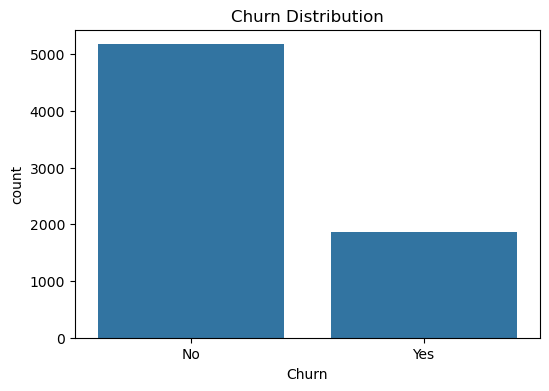

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")
plt.show()

In [62]:
#majority are customers stays that is churn =no

In [63]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

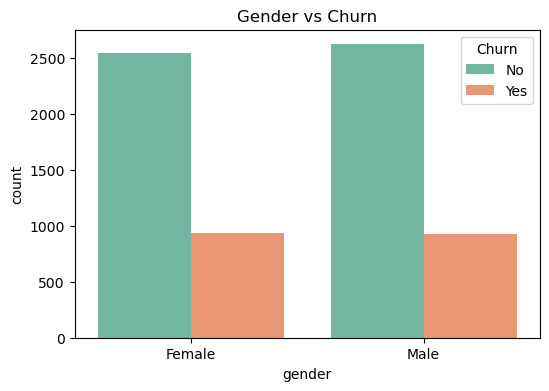

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette="Set2")
plt.title("Gender vs Churn")
plt.show()

In [17]:
#there is no gender different in the distribution of whether the customer stays or leaves

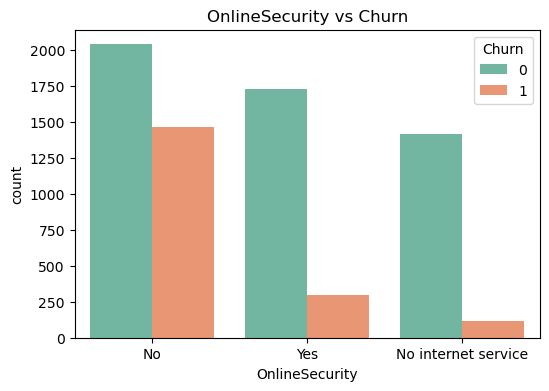

In [146]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette="Set2")
plt.title("OnlineSecurity vs Churn")
plt.show()

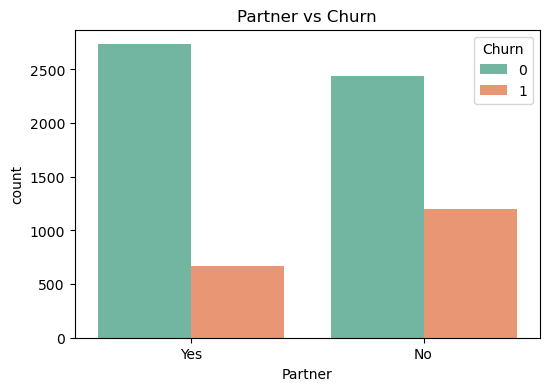

In [147]:
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df, palette="Set2")
plt.title("Partner vs Churn")
plt.show()

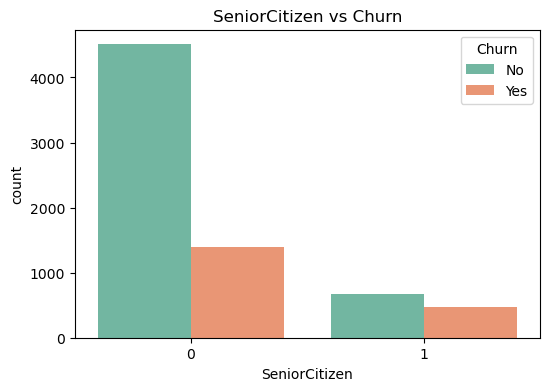

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette="Set2")
plt.title("SeniorCitizen vs Churn")
plt.show()

In [19]:
#majority of customer that is seniorcitizen stay in  the service and but a large amount leaves also. 
#in non seniorcitizen very high amount stays the service some amount leaves.

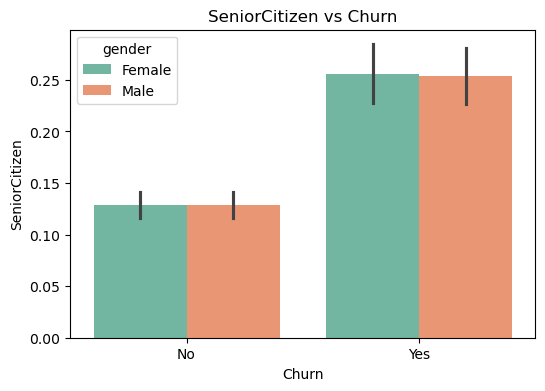

In [66]:
plt.figure(figsize=(6,4))
sns.barplot(y='SeniorCitizen',x='Churn', hue='gender', data=df, palette="Set2")
plt.title("SeniorCitizen vs Churn")
plt.show()

In [21]:
#gender has no signification in the churn.

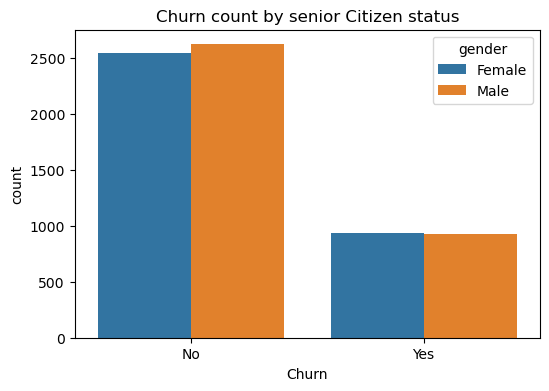

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',hue='gender',data=df)
plt.title("Churn count by senior Citizen status")
plt.show()
          

In [23]:
#amount of male slightly greater than female in which they stays on the service.

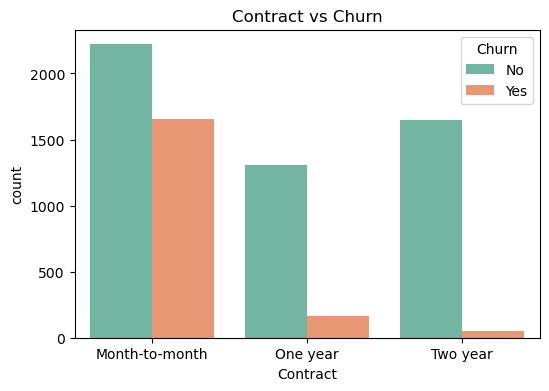

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette="Set2")
plt.title("Contract vs Churn")
plt.show()

In [25]:
#in the caase of month to month contract and also one year contract mostly the chance to leave the service so  give priority of this customer like give offer discount etc.

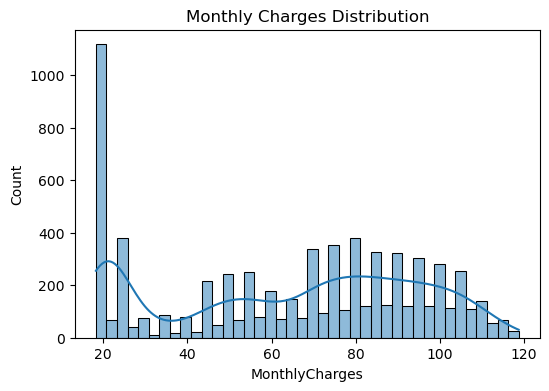

In [69]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=40, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

In [27]:
#the major amount of customers are paying monthly charge of 20 

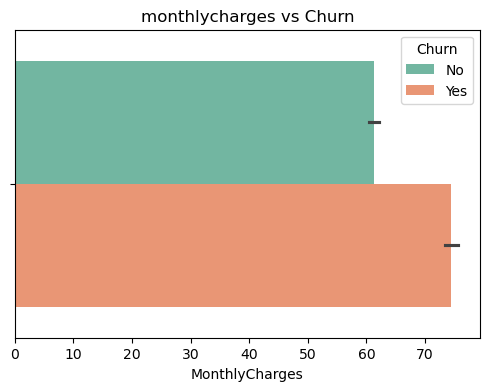

In [70]:
plt.figure(figsize=(6,4))
sns.barplot(x='MonthlyCharges', hue='Churn', data=df, palette="Set2")
plt.title("monthlycharges vs Churn")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6164\1387262392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")


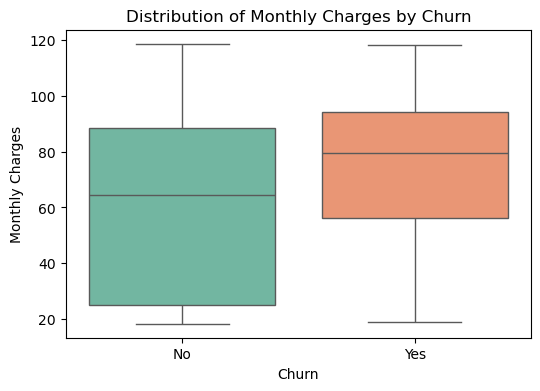

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
plt.title("Distribution of Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


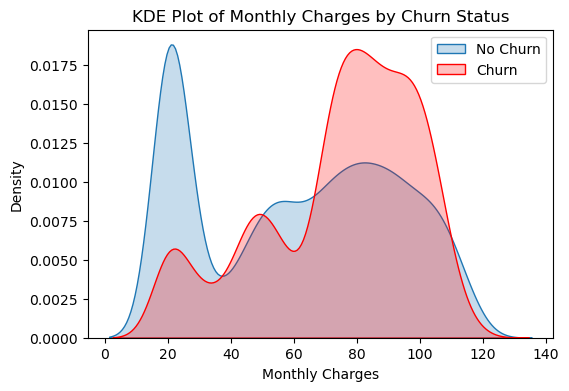

In [71]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', fill=True, color='red')
plt.title("KDE Plot of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.legend()
plt.show()

In [31]:
#mostly the high payments customer are leaving the service.

C:\Users\USER\AppData\Local\Temp\ipykernel_6164\1332982584.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('MonthlyChargeBin')['Churn'].value_counts(normalize=True).unstack()['Yes']


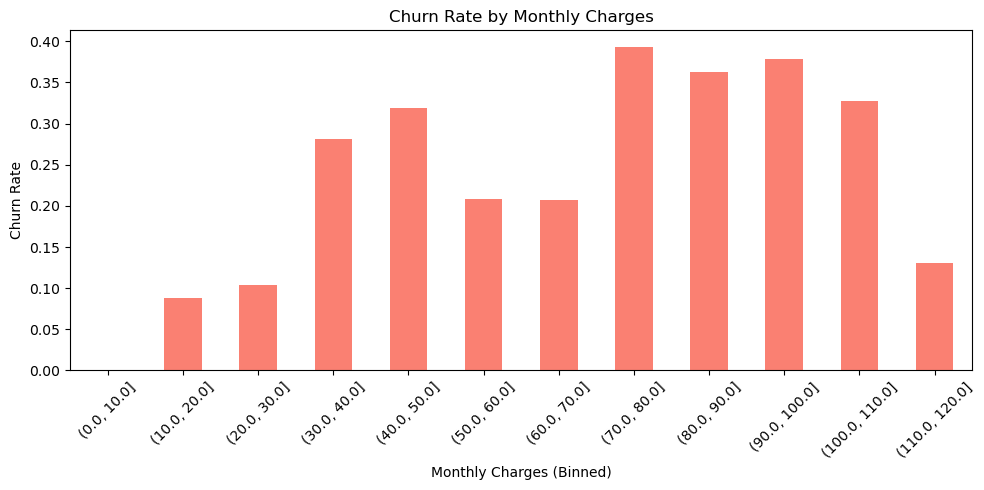

In [72]:
# Create charge bins
df['MonthlyChargeBin'] = pd.cut(df['MonthlyCharges'], bins=np.arange(0, df['MonthlyCharges'].max()+10, 10))

# Calculate churn rate per bin
churn_rate = df.groupby('MonthlyChargeBin')['Churn'].value_counts(normalize=True).unstack()['Yes']

# Plot
churn_rate.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
#customers in the range between 0 to 30 of monthly charges are more likely to stay and range between 70 to 100 are more likely to leave.

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 800x600 with 0 Axes>

In [ ]:
df.head()

<Axes: ylabel='tenure'>

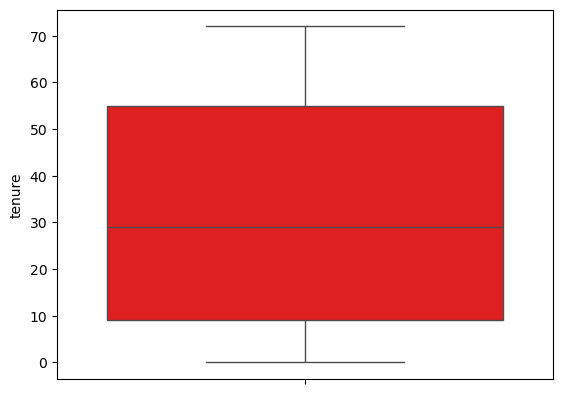

In [35]:
sns.boxplot(y=df['tenure'],color="red")

<Axes: ylabel='MonthlyCharges'>

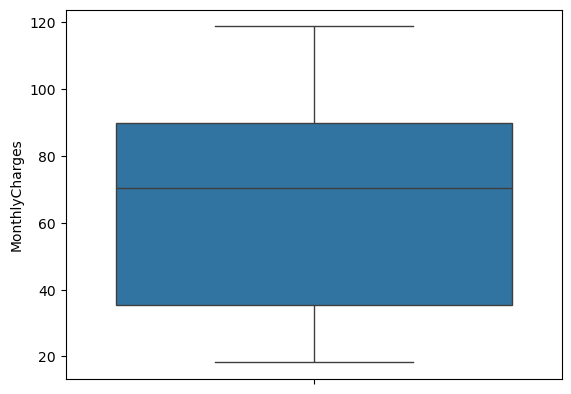

In [36]:
sns.boxplot(y=df['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

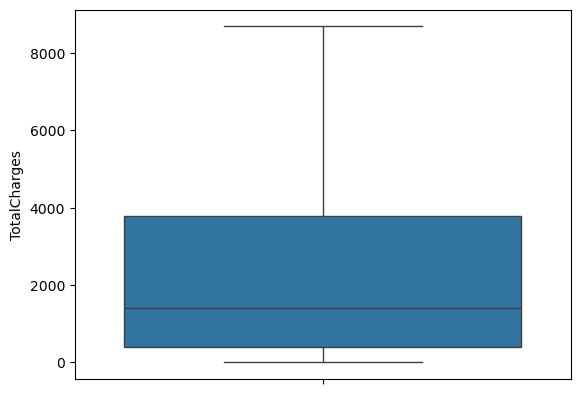

In [37]:
sns.boxplot(y=df['TotalCharges'])

In [38]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: ylabel='SeniorCitizen'>

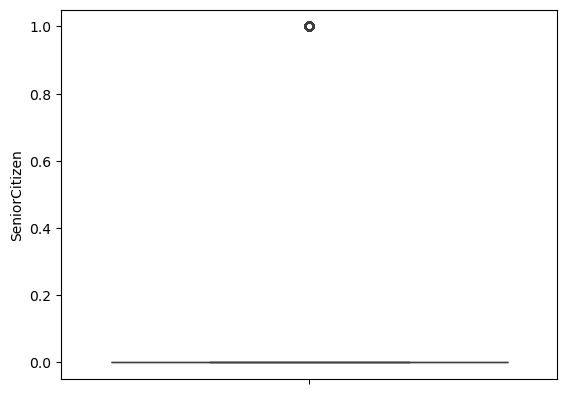

In [39]:
sns.boxplot(y=df['SeniorCitizen'])

In [73]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

# Example: encode 'Contract' column
le = LabelEncoder()
df['Contract_encoded'] = le.fit_transform(df['Contract'])

print("Classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df[['Contract', 'Contract_encoded']].head())


Classes mapping: {'Month-to-month': np.int64(0), 'One year': np.int64(1), 'Two year': np.int64(2)}
         Contract  Contract_encoded
0  Month-to-month                 0
1        One year                 1
2  Month-to-month                 0
3        One year                 1
4  Month-to-month                 0


In [76]:
# One-hot encode 'Contract' with numeric 0/1 instead of bool
df_encoded_1= pd.get_dummies(df, columns=['Contract'], drop_first=True, dtype=int)

print(df_encoded_1.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...              No   
1                No             DSL            Yes  ...              No   
2                No             DSL            Yes  ...              No   
3  No phone service             DSL            Yes  ...              No   
4                No     Fiber optic             No  ...              No   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCh

In [77]:
df_encoded_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeBin,Contract_encoded,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Yes,Electronic check,29.85,29.85,No,"(20.0, 30.0]",0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,Mailed check,56.95,1889.50,No,"(50.0, 60.0]",1,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,Mailed check,53.85,108.15,Yes,"(50.0, 60.0]",0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,Bank transfer (automatic),42.30,1840.75,No,"(40.0, 50.0]",1,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,Electronic check,70.70,151.65,Yes,"(70.0, 80.0]",0,0,0


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Contract_encoded'] = le.fit_transform(df['Contract'])

In [103]:
df['gender_encoded'] = le.fit_transform(df['gender'])

In [104]:
df['Partner_encoded'] = le.fit_transform(df['Partner'])

In [105]:
df['Dependents_encoded'] = le.fit_transform(df['Dependents'])

In [106]:
df['PhoneService_encoded'] = le.fit_transform(df['PhoneService'])

In [107]:
df['MultipleLines _encoded'] = le.fit_transform(df['MultipleLines'])

In [108]:
df['InternetService_encoded'] = le.fit_transform(df['InternetService'])

In [112]:
df['OnlineSecurity_encoded'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup_encoded'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection_encoded'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport_encoded'] = le.fit_transform(df['TechSupport'])
df['StreamingTV_encoded'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies_encoded'] = le.fit_transform(df['StreamingMovies'])
df['Contract_encoded'] = le.fit_transform(df['Contract'])
df['PaperlessBilling_encoded'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [117]:
df['OnlineBackup_encoded'] = le.fit_transform(df['OnlineBackup'])

In [124]:
df['MonthlyChargeBin'] = le.fit_transform(df['MonthlyChargeBin'])

In [118]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyChargeBin', 'Contract_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'PaperlessBilling_encoded', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'PhoneService_encoded', 'MultipleLines _encoded',
       'InternetService_encoded', 'StreamingTV_encode', 'Churn_encode'],
      dtype='object')

In [125]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_encoded,PaperlessBilling_encoded,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines _encoded,InternetService_encoded,StreamingTV_encode,Churn_encode
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,1,0,1,0,0,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,1,0,0,1,0,0,0,0


In [116]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 800x600 with 0 Axes>

In [126]:
df.dtypes

customerID                   object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                 int64
MonthlyCharges              float64
TotalCharges                float64
Churn                         int64
MonthlyChargeBin              int64
Contract_encoded              int64
OnlineSecurity_encoded        int64
OnlineBackup_encoded          int64
DeviceProtection_encoded      int64
TechSupport_encoded           int64
StreamingTV_encoded         

In [123]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyChargeBin', 'Contract_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'PaperlessBilling_encoded', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'PhoneService_encoded', 'MultipleLines _encoded',
       'InternetService_encoded', 'StreamingTV_encode', 'Churn_encode'],
      dtype='object')

In [134]:
df_1=df.drop(['customerID','gender','SeniorCitizen','Partner','Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'],axis=1)

In [135]:
df_1.head()

,MonthlyCharges,TotalCharges,MonthlyChargeBin,Contract_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines _encoded,InternetService_encoded,StreamingTV_encode,Churn_encode
0,29.85,29.85,1,0,0,2,0,0,0,0,1,0,1,0,0,1,0,0,0
1,56.95,1889.50,4,1,2,0,2,0,0,0,0,1,0,0,1,0,0,0,0
2,53.85,108.15,4,0,2,2,0,0,0,0,1,1,0,0,1,0,0,0,1
3,42.30,1840.75,3,1,2,0,2,2,0,0,0,1,0,0,0,1,0,0,0
4,70.70,151.65,6,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1


In [133]:
df_1.dtypes

customerID                   object
MonthlyCharges              float64
TotalCharges                float64
MonthlyChargeBin              int64
Contract_encoded              int64
OnlineSecurity_encoded        int64
OnlineBackup_encoded          int64
DeviceProtection_encoded      int64
TechSupport_encoded           int64
StreamingTV_encoded           int64
StreamingMovies_encoded       int64
PaperlessBilling_encoded      int64
gender_encoded                int64
Partner_encoded               int64
Dependents_encoded            int64
PhoneService_encoded          int64
MultipleLines _encoded        int64
InternetService_encoded       int64
StreamingTV_encode            int64
Churn_encode                  int64
dtype: object

In [136]:
df_1.corr()

,MonthlyCharges,TotalCharges,MonthlyChargeBin,Contract_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines _encoded,InternetService_encoded,StreamingTV_encode,Churn_encode
MonthlyCharges,1.000000,0.651174,0.994126,-0.074195,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,0.352150,-0.014569,0.096848,-0.113890,0.247398,0.433576,-0.323260,0.336706,0.193356
TotalCharges,0.651174,1.000000,0.646246,0.446855,0.253224,0.374410,0.387897,0.275625,0.391470,0.398066,0.158574,-0.000080,0.317504,0.062078,0.113214,0.452577,-0.175755,0.391470,-0.198324
MonthlyChargeBin,0.994126,0.646246,1.000000,-0.075750,-0.054654,0.117937,0.161390,-0.009199,0.331221,0.332130,0.349565,-0.013580,0.095974,-0.113604,0.243220,0.432340,-0.323797,0.331221,0.191361
Contract_encoded,-0.074195,0.446855,-0.075750,1.000000,0.374416,0.280980,0.350277,0.425367,0.227116,0.231226,-0.176733,0.000126,0.294806,0.243187,0.002247,0.110842,0.099721,0.227116,-0.396713
OnlineSecurity_encoded,-0.053878,0.253224,-0.054654,0.374416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,-0.157641,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,0.044669,-0.289309
OnlineBackup_encoded,0.119777,0.374410,0.117937,0.280980,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,-0.013370,-0.012057,0.153130,0.091015,0.024105,0.117327,0.036138,0.147186,-0.195525
DeviceProtection_encoded,0.163652,0.387897,0.161390,0.350277,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,-0.038234,0.000549,0.166330,0.080537,0.003727,0.122318,0.044944,0.276652,-0.178134
TechSupport_encoded,-0.008682,0.275625,-0.009199,0.425367,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,-0.113600,-0.006825,0.126733,0.133524,-0.019158,0.011466,-0.026047,0.161305,-0.282492
StreamingTV_encoded,0.336706,0.391470,0.331221,0.227116,0.044669,0.147186,0.276652,0.161305,1.000000,0.434772,0.096642,-0.006421,0.137341,0.046885,0.055353,0.175059,0.107417,1.000000,-0.036581
StreamingMovies_encoded,0.335459,0.398066,0.332130,0.231226,0.055954,0.136722,0.288799,0.161316,0.434772,1.000000,0.083700,-0.008743,0.129574,0.021321,0.043870,0.180957,0.098350,0.434772,-0.038492


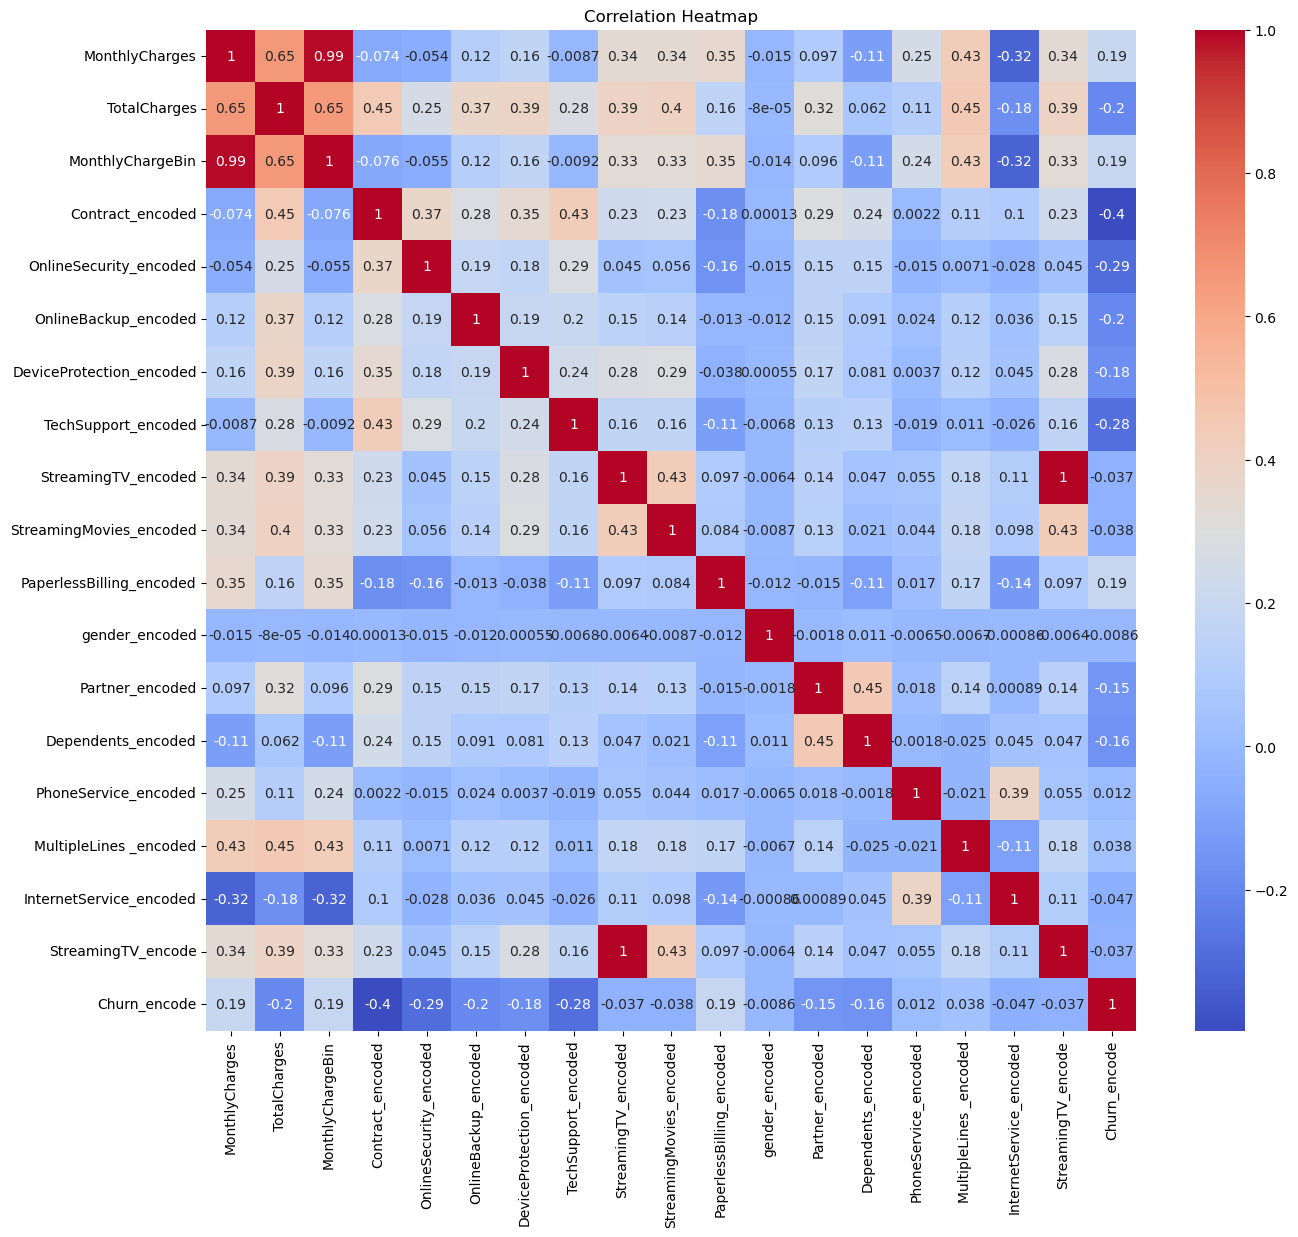

In [144]:
plt.figure(figsize=(15,13))
sns.heatmap(df_1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#monthly charges is positive correlation that means churn and monthlycharges are directly propotional so maintain and provide offers,discount for customer.
#online security is negative correlation ,that means customer without online security chance to leave the service  so give online security for customers stay the service